In [1]:
# импортируем необходимые библиотеки, классы и функции
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from prophet import Prophet

# загружаем данные
df = pd.read_csv('Data/divvy_daily.csv')

# подготавливаем датафрейм
df = df[['date', 'rides']]
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

# создаем модель
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4)

In [2]:
# добавляем в модель список праздников США
model.add_country_holidays(country_name='US')

22:03:33 - cmdstanpy - INFO - Chain [1] start processing
22:03:33 - cmdstanpy - INFO - Chain [1] done processing


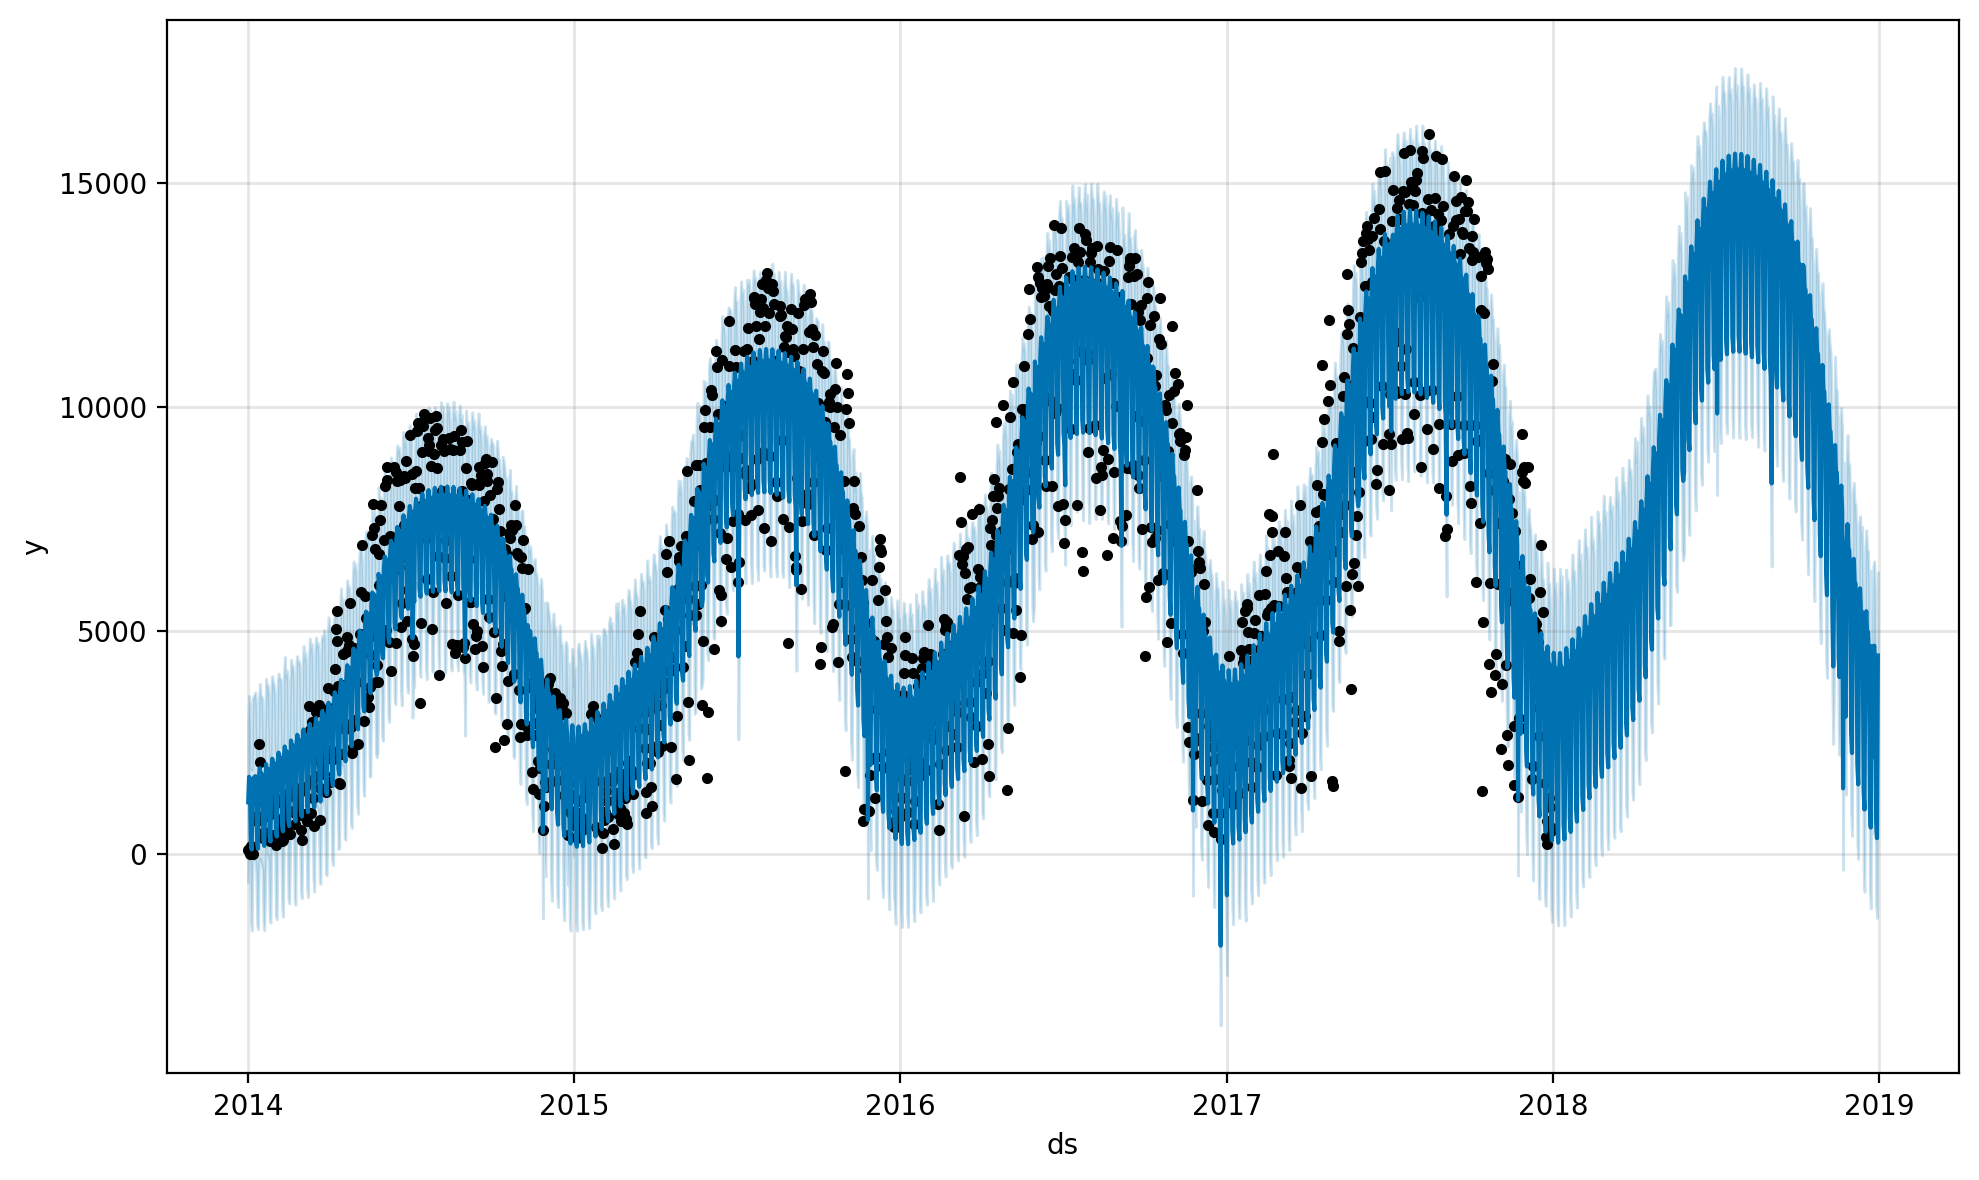

In [3]:
# обучаем модель и визуализируем прогнозы
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

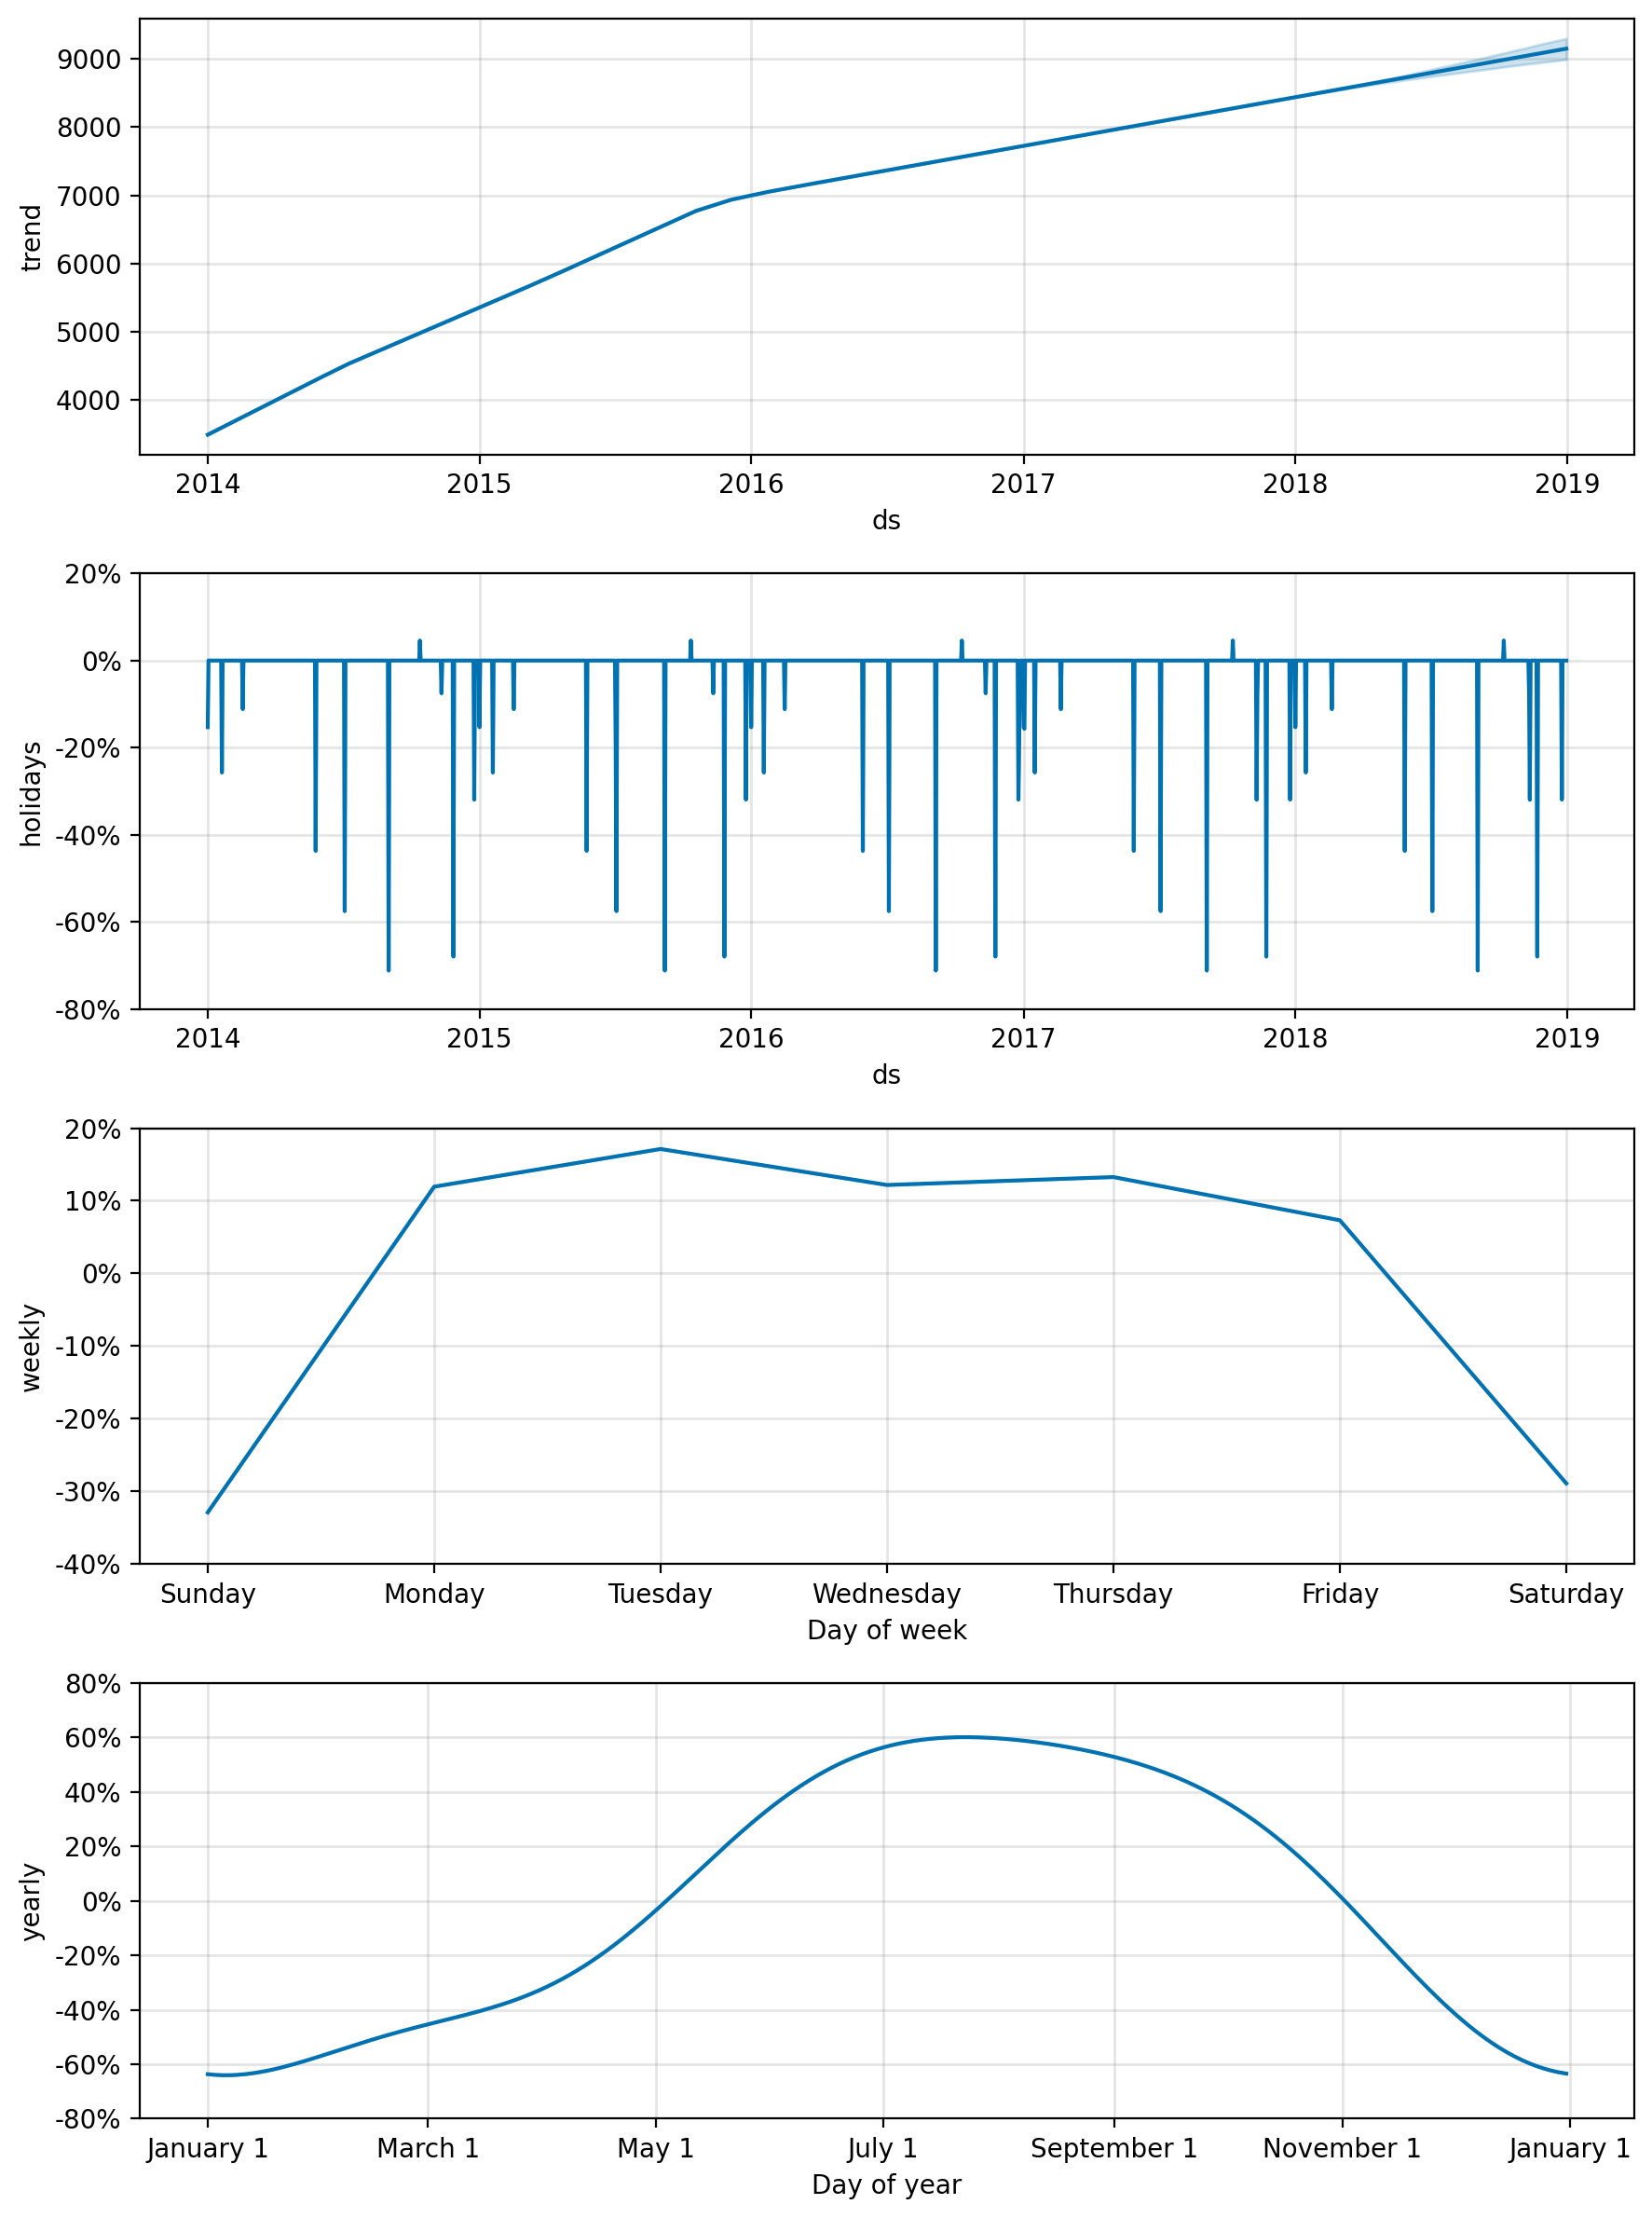

In [4]:
# строим графики компонент прогнозов
fig2 = model.plot_components(forecast)
plt.show()

In [5]:
# взглянем на список праздников
model.train_holiday_names

0                  New Year's Day
1      Martin Luther King Jr. Day
2           Washington's Birthday
3                    Memorial Day
4                Independence Day
5                       Labor Day
6                    Columbus Day
7                    Veterans Day
8                    Thanksgiving
9                   Christmas Day
10       Christmas Day (Observed)
11      New Year's Day (Observed)
12        Veterans Day (Observed)
13    Independence Day (Observed)
dtype: object

In [6]:
# увеличим количество выводимых строк
pd.set_option('display.max_rows', 100)
# смотрим первые 3 прогноза
forecast.head(3).T

,0,1,2
ds,2014-01-01 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00
trend,3493.210515,3498.740239,3504.269963
yhat_lower,-628.456087,-143.044888,-141.362051
yhat_upper,3005.261535,3541.331886,3325.317643
trend_lower,3493.210515,3498.740239,3504.269963
trend_upper,3493.210515,3498.740239,3504.269963
Christmas Day,0.0,0.0,0.0
Christmas Day_lower,0.0,0.0,0.0
Christmas Day_upper,0.0,0.0,0.0
Christmas Day (Observed),0.0,0.0,0.0


In [7]:
# пишем функцию, возвращающую названия праздников
# с ненулевым эффектом
def first_non_zero(fcst, holiday):
    return fcst[fcst[holiday] != 0][holiday].values[0]

# применяем функцию и получаем датафрейм, который
# содержит праздники с ненулевыми эффектами
pd.DataFrame({'holiday': model.train_holiday_names,
              'effect': [first_non_zero(forecast, holiday)
                         for holiday in model.train_holiday_names]})

,holiday,effect
0,New Year's Day,-0.152869
1,Martin Luther King Jr. Day,-0.256903
2,Washington's Birthday,-0.111548
3,Memorial Day,-0.436646
4,Independence Day,-0.574929
5,Labor Day,-0.711277
6,Columbus Day,0.045952
7,Veterans Day,-0.075101
8,Thanksgiving,-0.679231
9,Christmas Day,-0.319082


In [8]:
# импортируем функцию make_holidays_df()
from prophet.make_holidays import make_holidays_df

# создаем список годов
year_list = df['ds'].dt.year.unique().tolist()
# определяем последний год как целочисленное значение и увеличиваем
# его на 1 (поскольку прогнозируем на 1 год вперед)
year_list.append(year_list[-1] + 1)
# получаем датафрейм с праздниками, отмечаемыми в Иллинойсе
holidays = make_holidays_df(year_list=year_list,
                            country='US',
                            state='IL')
holidays.head()

,ds,holiday
0,2016-01-01,New Year's Day
1,2016-01-18,Martin Luther King Jr. Day
2,2016-02-12,Lincoln's Birthday
3,2016-02-15,Washington's Birthday
4,2016-03-07,Casimir Pulaski Day


In [9]:
# создаем модель Prophet, передав 
# полученные праздники, и обучаем
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                holidays=holidays)
model.fit(df)
# получаем прогнозы
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

22:03:36 - cmdstanpy - INFO - Chain [1] start processing
22:03:36 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
# получаем датафрейм с национальными праздниками
holidays = make_holidays_df(year_list=year_list, country='US')

In [11]:
# формируем датафреймы с датами праздников для 
# Черной пятницы и Рождественского сочельника
black_friday = pd.DataFrame({'holiday': 'Black Friday',
                             'ds': pd.to_datetime(['2014-11-28',
                                                   '2015-11-27',
                                                   '2016-11-25',
                                                   '2017-11-24',
                                                   '2018-11-23'])})

christmas_eve = pd.DataFrame({'holiday': 'Christmas Eve',
                              'ds': pd.to_datetime(['2014-12-24',
                                                    '2015-12-24',
                                                    '2016-12-24',
                                                    '2017-12-24',
                                                    '2018-12-24'])})

In [12]:
# конкатенируем датафреймы в один датафрейм
holidays = pd.concat([holidays, black_friday, christmas_eve]
                    ).sort_values('ds').reset_index(drop=True)

In [13]:
# создаем модель Prophet, передав 
# полученные праздники, и обучаем
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                holidays=holidays)
model.fit(df)
# получаем прогнозы
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

22:03:38 - cmdstanpy - INFO - Chain [1] start processing
22:03:38 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
# создаем датафрейм holidays с национальными 
# праздниками США по умолчанию
holidays = make_holidays_df(year_list=year_list, country='US')

# создадим датафрейм taste_of_chicago, в котором 5 дат, первые 
# 4 даты приходятся на первый день фестиваля каждого года в 
# наших исторических данных, а последняя дата приходится на 
# первый день фестиваля в прогнозируемый год, также добавляем 
# lower_window=0 и upper_window=4, т.е. 5 дней праздника
taste_of_chicago = pd.DataFrame({'holiday': 'Taste of Chicago',
                                 'ds': pd.to_datetime(['2014-07-09',
                                                       '2015-07-08',
                                                       '2016-07-06',
                                                       '2017-07-05',
                                                       '2018-07-11']),
                                 'lower_window': 0,
                                 'upper_window': 4})

# конкатенируем датафреймы в один датафрейм
holidays = pd.concat([holidays, taste_of_chicago]
                    ).sort_values('ds').reset_index(drop=True)

In [15]:
# выведем первые 10 строк итогового датафрейма
holidays.head(10)

,ds,holiday,lower_window,upper_window
0,2014-01-01,New Year's Day,NaN,NaN
1,2014-01-20,Martin Luther King Jr. Day,NaN,NaN
2,2014-02-17,Washington's Birthday,NaN,NaN
3,2014-05-26,Memorial Day,NaN,NaN
4,2014-07-04,Independence Day,NaN,NaN
5,2014-07-09,Taste of Chicago,0.0,4.0
6,2014-09-01,Labor Day,NaN,NaN
7,2014-10-13,Columbus Day,NaN,NaN
8,2014-11-11,Veterans Day,NaN,NaN
9,2014-11-27,Thanksgiving,NaN,NaN


In [16]:
# создаем модель Prophet, передав 
# полученные праздники, и обучаем
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                holidays=holidays)
model.fit(df)
# получаем прогнозы
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

22:03:40 - cmdstanpy - INFO - Chain [1] start processing
22:03:40 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
# посмотрим влияние фестиваля на количество поездок
forecast[forecast['ds'].isin(['2018-07-11',
                              '2018-07-12',
                              '2018-07-13',
                              '2018-07-14',
                              '2018-07-15']
                            )][['ds',
                                'Taste of Chicago']]

,ds,Taste of Chicago
1649,2018-07-11,-0.036053
1650,2018-07-12,0.021188
1651,2018-07-13,0.069376
1652,2018-07-14,0.014939
1653,2018-07-15,0.021556


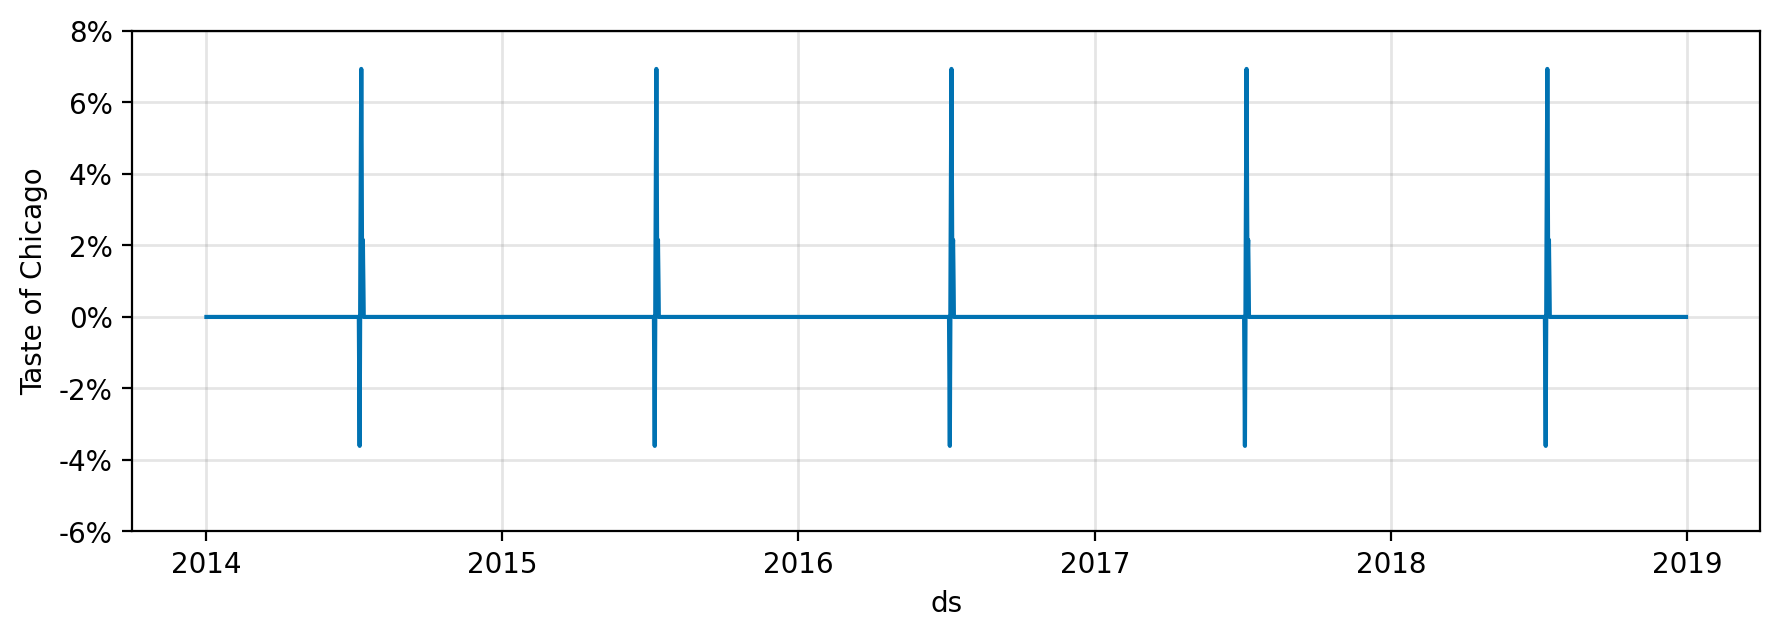

In [18]:
# импортируем функцию plot_forecast_component()
from prophet.plot import plot_forecast_component

# визуализируем влияние фестиваля на количество поездок
fig3 = plot_forecast_component(model,
                               forecast,
                               'Taste of Chicago',
                               figsize=(10.5, 3.25))
plt.show()

22:03:42 - cmdstanpy - INFO - Chain [1] start processing
22:03:42 - cmdstanpy - INFO - Chain [1] done processing


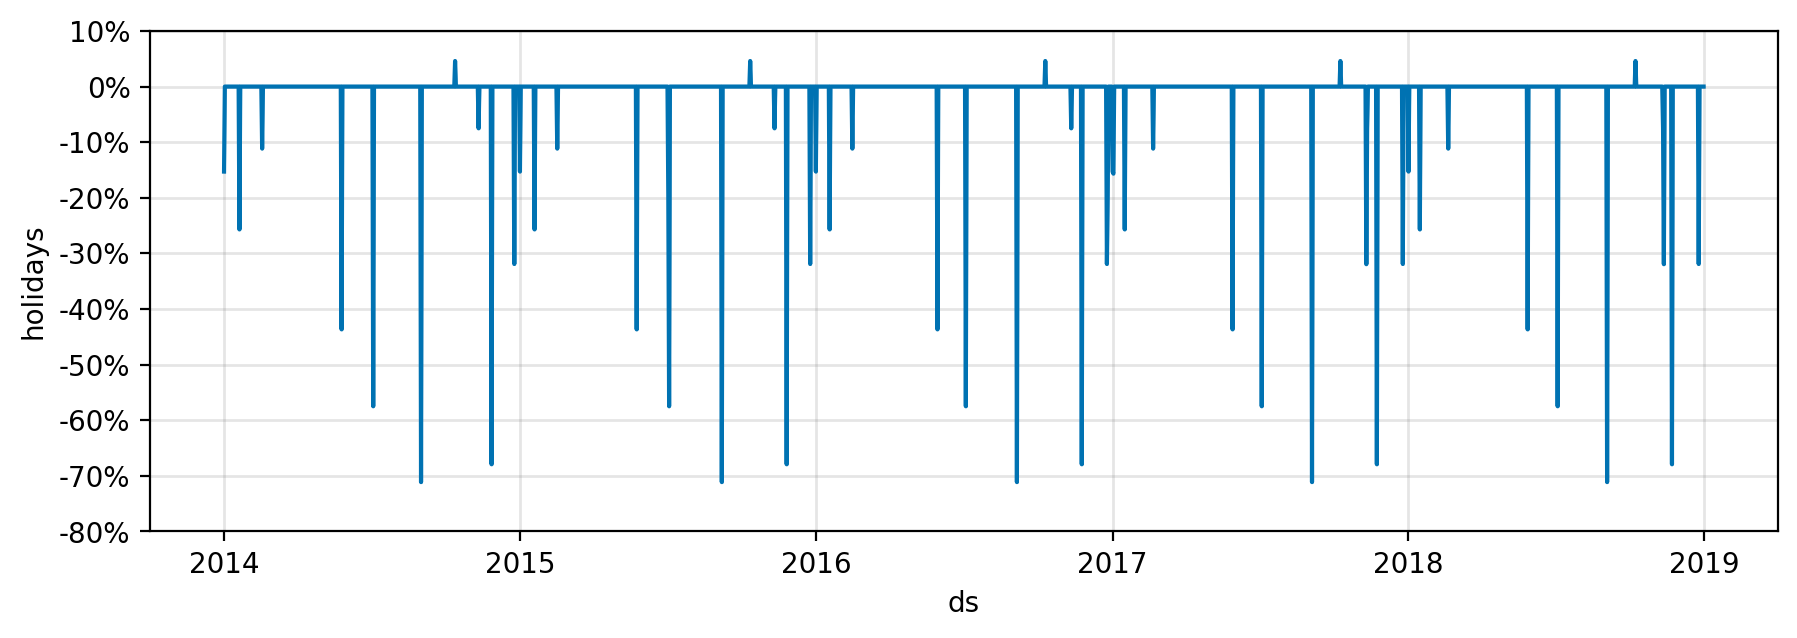

In [19]:
# создаем модель Prophet, передав
# полученные праздники, и обучаем
# со значением holidays_prior_scale=10
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                holidays_prior_scale=10)
model.add_country_holidays(country_name='US')
model.fit(df)
# получаем прогнозы
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
# визуализируем влияние фестиваля на количество поездок
fig = plot_forecast_component(model,
                              forecast,
                              'holidays',
                              figsize=(10.5, 3.25))
plt.show()

22:03:44 - cmdstanpy - INFO - Chain [1] start processing
22:03:44 - cmdstanpy - INFO - Chain [1] done processing


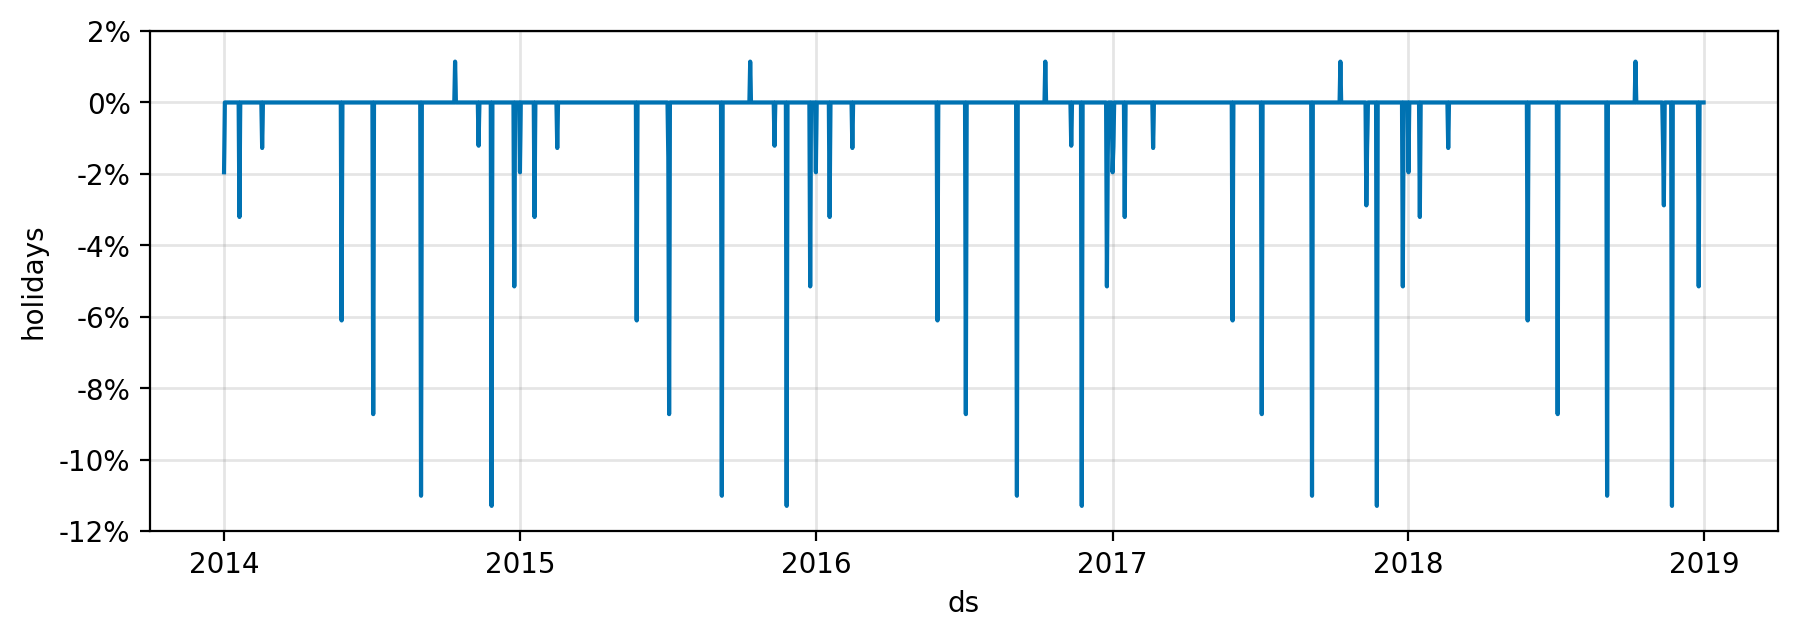

In [20]:
# создаем модель Prophet, передав полученные праздники, и обучаем
# со значением holidays_prior_scale=0.05
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                holidays_prior_scale=0.05)
model.add_country_holidays(country_name='US')
model.fit(df)
# получаем прогнозы
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
# визуализируем влияние фестиваля на количество поездок
fig = plot_forecast_component(model,
                              forecast,
                              'holidays',
                              figsize=(10.5, 3.25))
plt.show()

In [21]:
# воспользуемся ранее созданным списком year_list 
# для создания датафрейма holidays
holidays = make_holidays_df(year_list=year_list, country='US')

In [22]:
# создаем по датафрейму для каждого праздника, задав даты для
# исторических и будущих данных и значение prior_scale
black_friday = pd.DataFrame({'holiday': 'Black Friday',
                             'ds': pd.to_datetime(['2014-11-28',
                                                   '2015-11-27',
                                                   '2016-11-25',
                                                   '2017-11-24',
                                                   '2018-11-23']),
                             'prior_scale': 1})

christmas_eve = pd.DataFrame({'holiday': 'Christmas Eve',
                              'ds': pd.to_datetime(['2014-12-24',
                                                    '2015-12-24',
                                                    '2016-12-24',
                                                    '2017-12-24',
                                                    '2018-12-24']),
                              'prior_scale': 1})

taste_of_chicago = pd.DataFrame({'holiday': 'Taste of Chicago',
                                 'ds': pd.to_datetime(['2014-07-09',
                                                       '2015-07-08',
                                                       '2016-07-06',
                                                       '2017-07-05',
                                                       '2018-07-11']),
                                 'lower_window': 0,
                                 'upper_window': 4,
                                 'prior_scale': 0.1})

In [23]:
# конкатенируем датафреймы в один датафрейм
holidays = pd.concat([holidays,
                      black_friday,
                      christmas_eve,
                      taste_of_chicago]
                    ).sort_values('ds').reset_index(drop=True)

In [24]:
# выведем первые 16 строк итогового датафрейма
holidays.head(16)

,ds,holiday,prior_scale,lower_window,upper_window
0,2014-01-01,New Year's Day,NaN,NaN,NaN
1,2014-01-20,Martin Luther King Jr. Day,NaN,NaN,NaN
2,2014-02-17,Washington's Birthday,NaN,NaN,NaN
3,2014-05-26,Memorial Day,NaN,NaN,NaN
4,2014-07-04,Independence Day,NaN,NaN,NaN
5,2014-07-09,Taste of Chicago,0.1,0.0,4.0
6,2014-09-01,Labor Day,NaN,NaN,NaN
7,2014-10-13,Columbus Day,NaN,NaN,NaN
8,2014-11-11,Veterans Day,NaN,NaN,NaN
9,2014-11-27,Thanksgiving,NaN,NaN,NaN


In [25]:
# создаем модель Prophet, передав полученные праздники,
# и обучаем со значением holidays_prior_scale=10
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=4,
                holidays=holidays,
                holidays_prior_scale=10)
model.fit(df)
# получаем прогнозы
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

22:03:46 - cmdstanpy - INFO - Chain [1] start processing
22:03:46 - cmdstanpy - INFO - Chain [1] done processing
